The code was originally taken from a homework assignment, however I have worked further on this assignment adding my own analysis and more code segments.




We will be working with the Gapminder dataset for this exercise.Gapminder is a foundation, based on Sweden, that aims to enhance basic awareness of basic facts about the socioeconomic global world. As part of their efforts, they collect detailed statistics on life expectancy, population, and GDP, sometimes going back over many years.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
        
url = "gapminder_1.csv"
gapminder = pd.read_csv(url)
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Let's find out some basic info about the dataset! 

In [2]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


Based on this info, we know that the dataset ranges from the years of 1952-2007. The average life expectancy across the globe is approximately 59 years. The minimum life expectancy is 24 years and the maximum is 82 years.

In [3]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


No NaN values yay!! So no need to clean the dataset.

In [68]:
gapminder.groupby(['continent']).nunique()[['country']] #142 total countries


,country
continent,
Africa,52
Americas,25
Asia,33
Europe,30
Oceania,2


Based on this, we know that this dataset includes data from 52 out of the 54 countries in Africa, 25 out of the 35 countries in the Americas, 33 out of the 48 countries in Asia, 30 out of the 44 countries in Europe, and 2 out of the 14 countries in Oceania. It is noted that Anarctica is not included in the dataset, most likely due to the fact that there are no countries in Antartica.

Let's analyze the average life expectancy over the years for each country in each continent:

""


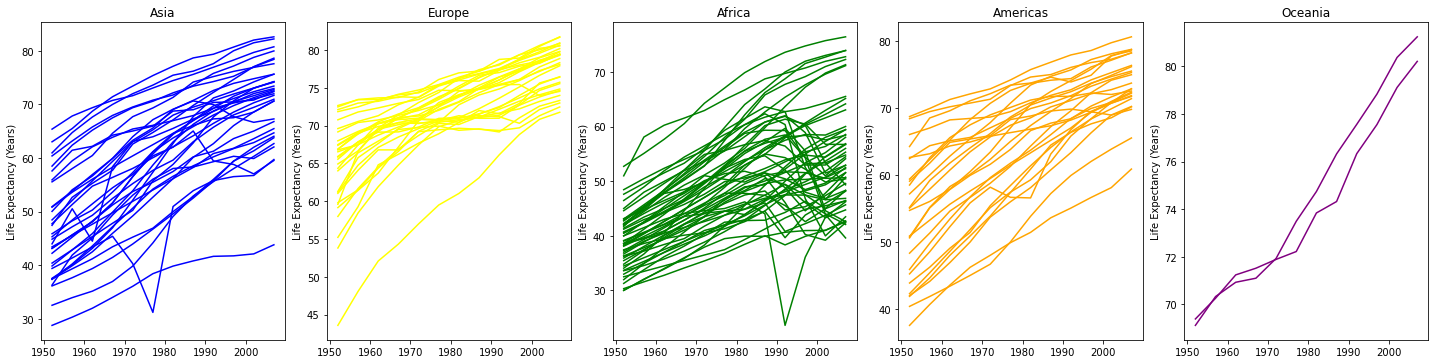

In [4]:

colors={"Asia": "blue",
       "Europe": "yellow",
       "Africa": "green",
       "Americas": "orange",
       "Oceania": "purple"}
indices={"Asia": 0,
        "Europe": 1,
        "Africa": 2,
        "Americas": 3,
        "Oceania": 4}


fig,ax=plt.subplots(1,5,figsize=(20,5))
plt.tight_layout() 
ax[0].set(ylabel="Life Expectancy (Years)")
def plot_country(df):
    '''This function takes in an input of dataset gapminder and 
    plots each country in the dataset
    to the corresponding continent axis.'''
    x=df['continent'].values[0] #subsets the continent column
    coloring=(colors[x]) #assigns corresponding color to continent
   
    index=indices[x]
    ax[index].plot(df["year"],df["lifeExp"],color=coloring) #plots country on correct continent axis
    
    ax[index].set(title=x)
    ax[index].set_ylabel('Life Expectancy (Years)') # Y label
    
    
    
    #



gapminder.groupby(["country"]).apply(plot_country)
    


There is a similar trend across all countries in each continent. In general, most of these countries have experienced an increase in life expectancy as the years have gone by. There are some dips in life expectancy for some countries, however they are generally quickly followed by another increase in life expectancy. These dips can be explained by extreme events like wars or famine.

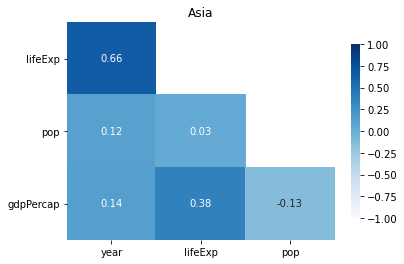

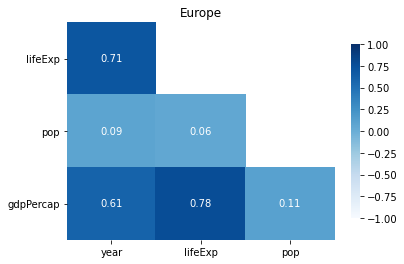

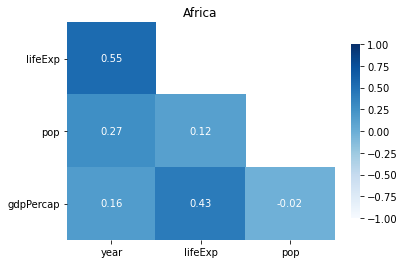

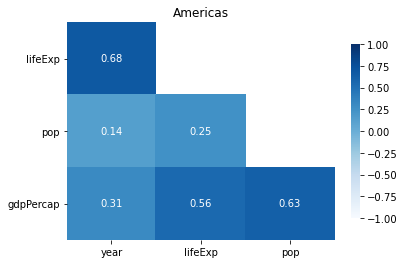

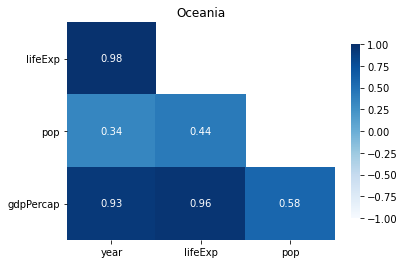

In [28]:
import seaborn as sns
d = ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
def corr_mat(df):
    for i in d:
        df_corr = gapminder.loc[gapminder['continent'] == i].corr()
        mask = np.triu(np.ones_like(df_corr, dtype=bool))
        # adjust mask and df
        mask = mask[1:, :-1]
        corr = df_corr.iloc[1:,:-1].copy()
    # plot heatmap
        sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    # yticks
        plt.yticks(rotation=0)
        plt.title(i)
       
        plt.show()

corr_mat(gapminder)


In general, the highest correlation is between life expectancy and year. This makes sense because as the years progress, access to things that prolong life expectancy like better health care and more advanced technology become more accessible. In general, the second highest correlation is between life expectancy and GDP per capita. Again, this makes sense because the more economically prosperous a nation is, the better access the average individual has to things like health care and advanced technology. It is important to note that Oceania has significantly higher correlation between year and life expectancy and between life expectancy and gdp. In this dataset, only two countries from Oceania are included and therefore the numbers are skewed.

Now let's look at the relationship between gdp and life expectancy.

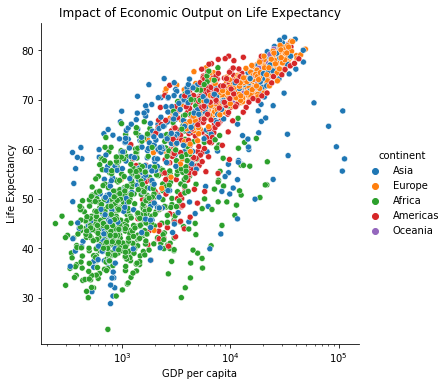

In [6]:
fgrid = sns.relplot(x = "gdpPercap", 
                    y = "lifeExp", 
                    hue = "continent", 
                    data = gapminder)

fgrid.axes[0][0].semilogx()

labels = fgrid.axes[0][0].set(xlabel = "GDP per capita", 
                              ylabel = "Life Expectancy",
                              title  = "Impact of Economic Output on Life Expectancy")

In general, the higher GDP per capita, the higher the life expectancy.

Now let's look at the relationship between gdp, life expectancy, and population over the years for each continent.

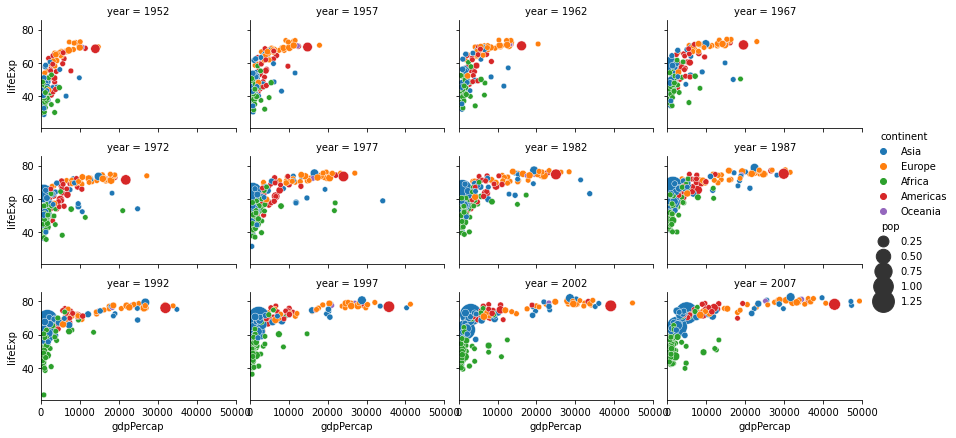

In [79]:

g= sns.relplot(x="gdpPercap",y="lifeExp",hue="continent",size="pop",data=gapminder,col="year",
            col_wrap=4,height=2,aspect=1.5,sizes=(30,500))

g.set(xlim=(0,50000))


Over the years, overall gdp and life expectancy for all continents has increased throughout the years. Throughout the years, Asian countries has signifcantly grown in population in comparison to other countries from different continents. Since for most of the countries, their life expectancy has increased regardless of whether or not the population has increased, it is safe to conclude that population does not significantly affect a country's overall life expectancy. From this, we can also see that in general that European countries tend to have the highest life expectancies. This is followed by the Americas, then Asia, and then Africa. There are too few countries in Oceania to make a conclusive result.

Now let's look at the gdp for each country for the dataset's most recent year, 2007.

<AxesSubplot:xlabel='gdpPercap', ylabel='country'>

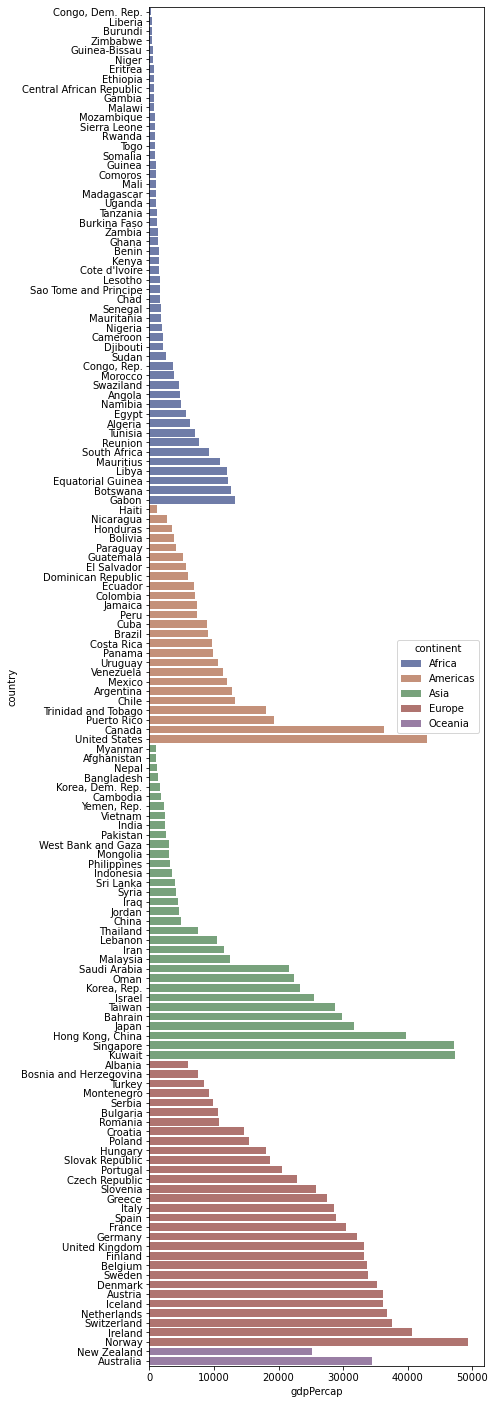

In [80]:
data=gapminder[gapminder['year']==2007]
data=data.sort_values(["continent", "gdpPercap"], ascending=True)
f, ax = plt.subplots(figsize=(6, 25))

sns.barplot(x="gdpPercap", 
            y="country", 
            hue = "continent",
            palette="dark",
            alpha = 0.6,
            data=data,
            dodge=False)


From the barplot we can see that the country with the highest gdp is Norway. In general, it seems that the European countries have the highest gdp compared to the rest of the world. It is interesting to note that Asian countries tend to have a higher gdp than the Americas, yet according to the graphs above the Americas tend to have a higher life expectancy than Asian countries.

Let's focus on how the gdp for each continent is distributed.

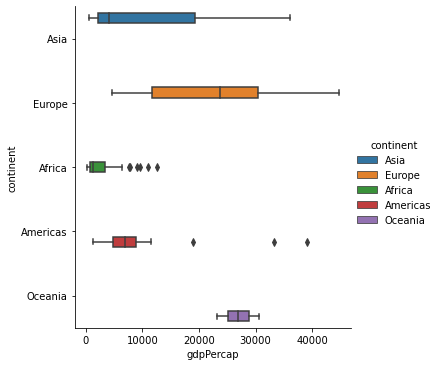

In [10]:
data=gapminder[gapminder['year']==2002]
sns.catplot(kind="box",x="gdpPercap",y="continent",data=data,hue="continent")

Overall, European countries have the highest median gdp, followed by Oceania, the Americas, Asia, and Africa. It is interesting to note that despite Asia having one of the higher maximum GDPs, Asia's median GDP is significantly less than many of the other continents. Furthermore, Asia's high Q3 tells us that there is greater dispersion among the larger GDP values. 

# Final Thoughts

Overall, we can see a clear correlation between life expectancy and GDP. This correlation makes sense as countries with higher GDPs tend to have more access to more advanced technology and medicine that may contribute to a higher life expectancy. It would be interesting to analyze other variables in relation to life expectancy such as a continent's crime rate, access to health care, access to fresh food, and more. Overall, Europe seems to have the highest life expectancy as well as overall median GDP. The continent with the next highest life expectancy is Oceania, followed by the Americas, Asia, and Africa. The ranks of the median GDPs follows the same pattern.